In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from sklearn.decomposition import PCA

In [5]:
df = data.DataReader(['ADA-USD', 'BCH-USD', 'BNB-USD', 'BTC-USD', 'DASH-USD', 'EOS-USD', 'ETH-USD', 'MIOTA-USD', 'LINK-USD', 'LTC-USD', 'TRX-USD', 'USDT-USD', 'XLM-USD', 'XMR-USD', 'XRP-USD'], 'yahoo', start='2018/01/01', end='2019/12/31')
df = df['Adj Close']
print(df.head())

Symbols      ADA-USD      BCH-USD  BNB-USD       BTC-USD     DASH-USD  \
Date                                                                    
2017-12-31  0.719695  2533.010010  8.63558  14156.400391  1051.680054   
2018-01-01  0.728657  2432.540039  8.41461  13657.200195  1053.979980   
2018-01-02  0.782587  2711.000000  8.83777  14982.099609  1217.719971   
2018-01-03  1.079660  2608.689941  9.53588  15201.000000  1170.739990   
2018-01-04  1.114120  2430.179932  9.21399  15599.200195  1229.790039   

Symbols      EOS-USD     ETH-USD  MIOTA-USD  LINK-USD     LTC-USD   TRX-USD  \
Date                                                                          
2017-12-31   8.76595  756.732971    3.55087  0.601552  232.095993  0.044752   
2018-01-01   8.84318  772.640991    3.97440  0.733563  229.033005  0.051695   
2018-01-02   9.33471  884.443970    3.99615  0.673712  255.684006  0.078682   
2018-01-03  10.22790  962.719971    4.12684  0.681167  245.367996  0.094703   
2018-01-04  11

In [6]:
data_returns = df.pct_change().dropna().apply(lambda x: np.log(1+x)) #daily log returns
norm_data = (data_returns - data_returns.mean())/data_returns.std() #normalized log returns

Visualizing log returns for ADA-USD stocks

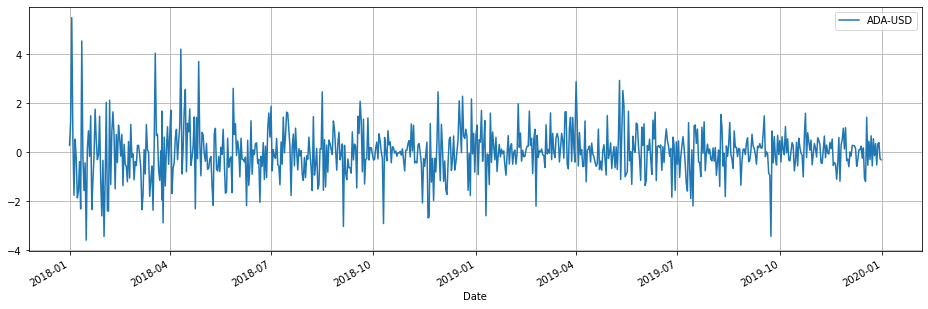

In [7]:
plt.figure(figsize=(16, 5))
norm_data['ADA-USD'].plot()
plt.grid(True);
plt.legend()
plt.show()

Divide dataset for training & testing

In [8]:
percentage = int(len(data_returns) * 0.8)
X_train = norm_data[:percentage]
X_test = norm_data[percentage:]

X_train_raw = data_returns[:percentage]
X_test_raw = data_returns[percentage:]

In [9]:
cov_matrix = X_train.cov()
pca = PCA()
pca.fit(cov_matrix)

PCA()

Lets check the PCA dimensions

In [10]:
cov_matrix_raw = X_train_raw.cov()
var_threshold = 0.95
var_explained = np.cumsum(pca.explained_variance_ratio_)

In [20]:
num_comp = np.where(np.logical_not(var_explained < var_threshold))
print(num_comp)

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),)


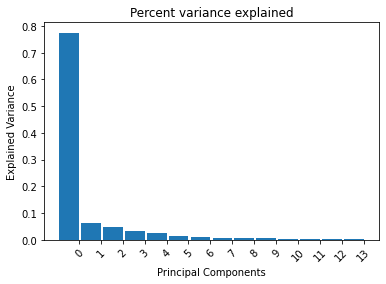

In [23]:
bar_width = 0.9
x_indx = np.arange(n_asset)
fig, ax = plt.subplots()

stock_tickers = norm_data.columns.values[:-1]
n_asset = stock_tickers.shape[0]

rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width)
ax.set_xticks(x_indx + bar_width / 2)
ax.set_xticklabels(list(range(n_asset)), rotation=45)
ax.set_title('Percent variance explained')
ax.set_ylabel('Explained Variance')
ax.set_xlabel('Principal Components')
plt.show()

In [26]:
projected = pca.fit_transform(cov_matrix)
pcs = pca.components_